In [1]:
import scipy.io
import os
import re
import glob
import importlib

import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

import utils as util
import plotting as putil
import importlib

In [2]:
%matplotlib notebook
putil.set_sns_style(style='dark', min_fontsize=12)

In [3]:
rootdir = '/mnt/minerva/courtship-videos'
# rootdir = '/mnt/sda/Videos'
assay='single_20mm_1x1'

sessionpaths = sorted(glob.glob(os.path.join(rootdir, assay, '202*')), key=util.natsort)
len(sessionpaths)

67

# load saved matlab structs

In [4]:
basedir = '/mnt/minerva/analysis/FlyTracker'
# matlab_src = '/home/julianarhee/Documents/projects/flytracker-analysis/overviews2/Ddata.mat'
matlab_src = os.path.join(basedir, 'flytracker-matlab/overviews2/Ddata.mat')
# Set save dir
destdir = os.path.join(basedir, 'figures')
if not os.path.exists(destdir):
    os.makedirs(destdir)
# set FIGID
figid = 'flytracker-matlab/overviews2/Ddata.mat'
# load MAT
mat = scipy.io.loadmat(matlab_src, simplify_cells=True)
species_list = [k for k in mat.keys() if not k.startswith('__')]
# assert len(species_list)==1, "Did not find unique struct name: %s" % str(struct_name)
print("Found species in struct: {}".format(species_list))

Found species in struct: ['mauritiana', 'yakuba', 'santomea', 'melanogaster', 'simulans']


In [9]:
sp = species_list[0]
acq_ix = 0
acq_mat = mat[sp][acq_ix]

# print(sp)
# bin_ = util.mat_combine_binary_behaviors(acq_mat) #mat[sp][acq_ix])
# # Get bout starts
# bin_ = util.mat_split_courtship_bouts(bin_)
# # wing bouts?
# wings_ = util.mat_get_bout_indices(acq_mat) #mat[sp][acq_ix])

mauritiana


In [28]:

behavior_names = ['All Wing Extensions', 'Putative Tap Events', 'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting']
nonorienting_names = [b for b in behavior_names if b!='Orienting']
print(nonorienting_names)

['All Wing Extensions', 'Putative Tap Events', 'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts']


In [140]:
no_trk=[]; found_trk=[];
for sess in sessionpaths:
    found_mats = glob.glob(os.path.join(sess, '**',  '*feat.mat'))
    if len(found_mats)==0:
        no_trk.append(os.path.split(sess)[-1])
    else:
        found_trk.append(os.path.split(sess)[-1])
        
f_list = []; #t_list=[];
for i, sp in enumerate(found_trk):
    calib_, trk_, feat_ = util.load_flytracker_data(os.path.join(rootdir, assay, sp))
    if 'cop_ind' not in calib_.keys():
        print(sp, 'No cop')
    else:
        print(sp, calib_['cop_ind'])
    # get species
    species_abbr = sp.split('_')[1]
    species_strain = 'na'
    if species_abbr.startswith('mau'):
        species_strain = species_abbr[3:]
        species_abbr = species_abbr[0:3]
    elif species_abbr in ('Canton-S', 'ctns'):
        species_abbr = 'mel'
        species_strain = 'cantons'
    # get age
    age = int(re.sub('\D', '', sp.split('_')[2]))
    # get sex
    if float(feat_.groupby('id')['max_wing_ang'].mean().round(1).diff().abs().dropna()) == 0: # difference is super tiny
        ix_male = trk_.groupby('id')['body_area'].mean().idxmin() # use body size
    else:
        ix_male = feat_.groupby('id')['max_wing_ang'].mean().idxmax()
    feat_.loc[feat_['id']==ix_male, 'sex'] = 'm'
    feat_.loc[feat_['id']!=ix_male, 'sex'] = 'f'
    #print('--', species_abbr, age, feat_['sex'].unique(), 'male ID: {}'.format(feat_[feat_['sex']=='m']['id'].unique()[0]))
    # update
    feat_['species'] = species_abbr
    feat_['strain'] = species_strain
    feat_['age'] = age
    feat_['acquisition'] = sp
    feat_['copulation_index'] = calib_['cop_ind']
    feat_['copulation'] = calib_['cop_ind']>0
    grab_index = calib_['cop_ind']-1 if calib_['cop_ind']>0 else feat_.iloc[-1].name
    f_list.append(feat_[feat_['frame']<=grab_index])
    # add trk, too
    #trk_['acquisition'] = sp
    #t_list.append(trk_[trk_['frame']<=grab_index])
feat = pd.concat(f_list) #.reset_index(drop=True)

20220128-1516_mauR4_4do_gh 0
-- mau 4 ['m' 'f'] male ID: 0
20220128-1555_mauR4_4do_gh 40631
-- mau 4 ['m' 'f'] male ID: 0
20220130-1125_ctns_4do_sh 13832
-- mel 4 ['m' 'f'] male ID: 0
20220130-1143_mauR_4do_sh 0
-- mau 4 ['m' 'f'] male ID: 0
20220202-0930_mauW_7do_sh 66420.0
-- mau 7 ['m' 'f'] male ID: 0
20220202-1013_yak_3do_sh 0
-- yak 3 ['m' 'f'] male ID: 0
20220202-1051_yak_3do_sh 0
-- yak 3 ['m' 'f'] male ID: 0
20220202-1146_rsim_7do_sh 0
-- rsim 7 ['m' 'f'] male ID: 0
20220202-1415_sant_7do_sh 0
-- sant 7 ['m' 'f'] male ID: 0
20220203-0912_sant_3do_sh 15320
-- sant 3 ['m' 'f'] male ID: 0
20220203-0951_sant_3do_sh 7085
-- sant 3 ['m' 'f'] male ID: 0
20220203-0955_mauR_7do_sh 32110
-- mau 7 ['m' 'f'] male ID: 0
20220203-1025_sant_3do_sh 19097
-- sant 3 ['m' 'f'] male ID: 0
20220203-1147_yak_7do_sh 62826
-- yak 7 ['m' 'f'] male ID: 0
20220212-1041_rsim_3do_sh 0
-- rsim 3 ['m' 'f'] male ID: 0
20220301_Canton-S_age5_m_sh_f_gh_1 9485
-- mel 5 ['m' 'f'] male ID: 0
20220301_Canton-S_age5

In [151]:
binevs_list=[]
for sp in species_list:
    if not isinstance(mat[sp], list):
        mat[sp] = [mat[sp]]
    for acq_ix, acq_mat in enumerate(mat[sp]):
        acq = acq_mat['acquisition']
        #print(sp, acq)
        bin_ = util.mat_combine_binary_behaviors(acq_mat) #mat[sp][acq_ix])
        # Get bout starts
        bin_ = util.mat_split_courtship_bouts(bin_)
        # wing bouts?
        bin_['Unilateral Wing Extensions'] = [1 if (l==1 or r==1) and (l!=r) else 0 for (l, r) \
                                  in bin_[['Left Wing Extensions', 'Right Wing Extensions']].values]
        ori_only = bin_[(bin_[nonorienting_names].eq(0).all(1)) & (bin_['Orienting'])]
        bin_['Orienting Only'] = 0
        bin_['Orienting Only'].loc[ori_only.index] = 1
        #bouts_ = util.mat_get_bout_indices(acq_mat) #mat[sp][acq_ix])
        # get features mat
        feat_ = feat[(feat['acquisition']==acq) & (feat['sex']=='m')].copy()
        assert bin_.shape[0]==feat_.shape[0], "Incorrect shapes for merging: binary evs {} and feat {}".format(bin_.shape, feat_.shape)
        evs_ = pd.merge(bin_, feat_, left_index=True, right_index=True)
        # bouts
        #bouts_['acquisition'] = acq_mat['acquisition']
        #bouts_['species'] = sp
        #bouts_['strain'] = feat_['strain'].unique()[0]
        binevs_list.append(evs_)
events = pd.concat(binevs_list).reset_index()
# add bout durations
for aq, df_ in events.groupby('acquisition'):
    dur_dict = util.get_bout_durs(df_)
    events.loc[df_.index, 'boutdur'] = [dur_dict[v] for v in df_['boutnum']]

mauritiana 20220128-1516_mauR4_4do_gh
mauritiana 20220128-1555_mauR4_4do_gh
mauritiana 20220130-1143_mauR_4do_sh
mauritiana 20220202-0930_mauW_7do_sh
mauritiana 20220203-0955_mauR_7do_sh
yakuba 20220202-1013_yak_3do_sh
yakuba 20220202-1051_yak_3do_sh
yakuba 20220203-1147_yak_7do_sh
santomea 20220202-1415_sant_7do_sh
santomea 20220203-0912_sant_3do_sh
santomea 20220203-0951_sant_3do_sh
santomea 20220203-1025_sant_3do_sh
melanogaster 20220130-1125_ctns_4do_sh
melanogaster 20220301_Canton-S_age5_m_sh_f_gh_1
melanogaster 20220301_Canton-S_age5_m_sh_f_gh_3
melanogaster 20220301_Canton-S_age5_m_sh_f_gh_4
melanogaster 20220301_Canton-S_age5_m_sh_f_gh_6
melanogaster 20220303_Canton-S_age4_m_sh_f_gh_7
melanogaster 20220307_Canton-S_age5_2
melanogaster 20220307_Canton-S_age5_3
melanogaster 20220307_Canton-S_age5_m_sh_f_gh_4_6
melanogaster 20220307_Canton-S_age5m_sh_f_gh_5
melanogaster 20220525_Canton-S_age4_m_sh_f_gh_1
melanogaster 20220525_Canton-S_age5_m_sh_f_age4_gh_2
melanogaster 20220525_Ca

In [152]:
events.columns

Index(['index', 'All Wing Extensions', 'Putative Tap Events', 'Chasing',
       'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
       'Disengaged', 'Time Vector (s)', 'Copulation Start (s)',
       'Left Wing Extensions', 'Right Wing Extensions',
       'Bilateral Wing Extensions', 'boutnum', 'Unilateral Wing Extensions',
       'Orienting Only', 'vel', 'ang_vel', 'min_wing_ang', 'max_wing_ang',
       'mean_wing_length', 'axis_ratio', 'fg_body_ratio', 'contrast',
       'dist_to_wall', 'dist_to_other', 'angle_between', 'facing_angle',
       'leg_dist', 'id', 'fpath', 'frame', 'sec', 'sex', 'species', 'strain',
       'age', 'acquisition', 'copulation_index', 'copulation', 'boutdur'],
      dtype='object')

In [155]:
import scipy.stats as spstats

def groupby_circmeans(d_, circ_vars=['min_wing_ang', 'max_wing_ang',  'angle_between', 'facing_angle']):
    return pd.concat([pd.DataFrame({varname: spstats.circmean(d_[varname], np.pi, 0)}, index=[0]) for varname in circ_vars], axis=1)

In [221]:
# Get SUM/MEAN of each binary event per bout
groups = ['species', 'acquisition','copulation']
bouts = events.groupby(groups, group_keys=True)\
                 .apply(util.get_bout_durs, return_as_df=True).reset_index()
# grab_cols =  ['All Wing Extensions', 'Putative Tap Events', 'Chasing', 
#               'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting']
count_cols = [
    'Disengaged', 'Orienting',  'Orienting Only', 'Putative Tap Events', 
    'Chasing', 'Unilateral Wing Extensions',  'Licking/Proboscis Ext', 'Copulation Attempts'
]
max_cols = ['Time Vector (s)']
count_cols.extend(['species', 'acquisition', 'boutnum'])
max_cols.extend(['species', 'acquisition', 'boutnum'])
counts = events.groupby(['acquisition', 'species', 'boutnum']).mean().reset_index()[count_cols] ## should it be counts? maybe a fraction (fraction of bout)
maxs = events.groupby(['acquisition', 'species', 'boutnum']).max().reset_index()[max_cols]
counts = counts.merge(maxs, on=['acquisition', 'species', 'boutnum'])
bouts = bouts.merge(counts, on=['acquisition', 'species', 'boutnum'])

# get FEAT averages by bout 
feat_vars = ['vel', 'ang_vel', 'mean_wing_length',
           'axis_ratio', 'fg_body_ratio', 'contrast', 'dist_to_wall',
           'dist_to_other', 'leg_dist']
circ_vars = ['min_wing_ang', 'max_wing_ang',  'angle_between', 'facing_angle']
# Get average per bout for the other values
feat_vars.extend(['species', 'acquisition', 'boutnum'])
feat_means = events.groupby(['acquisition', 'species', 'boutnum']).mean().reset_index()[feat_vars]
feat_means_circ = events.groupby(['acquisition', 'species', 'boutnum']).apply(groupby_circmeans).reset_index()
feat_means = feat_means.merge(feat_means_circ, on=['acquisition', 'species', 'boutnum'])

# Merge with FEAT averages 
bouts = bouts.merge(feat_means, on=['acquisition', 'species', 'boutnum'])
bouts.shape, feat_means.shape, feat_means_circ.shape

((4576, 29), (4576, 17), (4576, 8))

In [226]:
bouts['leg_dist_norm'] = bouts['leg_dist']/bouts['leg_dist'].max()
bouts['vel_norm'] = bouts['vel']/bouts['vel'].max()
bouts['boutdur_norm'] = bouts['boutdur']/300 #bouts['boutdur'].max()

In [227]:
bouts['boutdur'].median()

0.7000000000000455

In [228]:
curr_species = ['mau', 'mel', 'sant', 'yak']

In [229]:
bouts['species'].unique()

array(['mau', 'mel', 'rsim', 'sant', 'yak'], dtype=object)

<IPython.core.display.Javascript object>


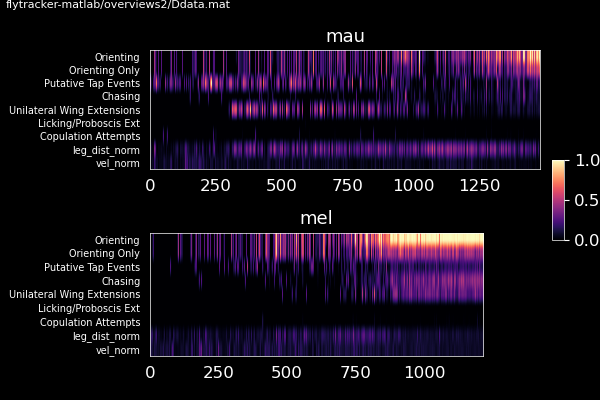

0
1
events-by-bout_sort-boutdur_mau-mel


In [307]:
plot_behaviors = [
    'Orienting', 'Orienting Only',  'Putative Tap Events', 
    'Chasing', 'Unilateral Wing Extensions',  'Licking/Proboscis Ext', 'Copulation Attempts',
    'leg_dist_norm', 'vel_norm'
]
curr_species = ['mau', 'mel'] #, 'santomea', 'yakuba']
n_species = len(curr_species)
plotdf = bouts[bouts['species'].isin(curr_species)].copy()
fig, axn = pl.subplots( n_species, 1,  figsize=(6,4))
for ai, (sp, df_) in enumerate(plotdf.groupby(['species'])):
    print(ai)
    ax=axn[ai]
    df_ = df_.copy().sort_values(by='boutdur')
    im = ax.imshow(df_[plot_behaviors].T, cmap='magma', vmin=0, vmax=1)
    ax.set_aspect(50)
    ax.set_title(sp)
    ax.set_yticks(np.arange(0, len(plot_behaviors), 1))
    ax.set_yticks(np.arange(-0.5, len(plot_behaviors), 1), minor=True)
    ax.set_yticklabels(plot_behaviors, fontsize=7) #[plot_behaviors[int(v)] if v%1==0 else '' for i, v in enumerate(np.arange(0, len(plot_behaviors), 0.5))], fontsize=7)
for ax in axn:
    ax.set_anchor('W')
    #ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

pl.subplots_adjust(left=0.25, right=0.9)
cbar_ax = fig.add_axes([0.92, 0.4, 0.02, 0.2])
fig.colorbar(im, cax=cbar_ax)
pl.subplots_adjust(hspace=0.5)

putil.label_figure(fig, figid)
figname = 'events-by-bout_sort-boutdur_{}'.format('-'.join(curr_species))
pl.savefig(os.path.join(destdir, '{}.png'.format(figname)))
print(figname)

<IPython.core.display.Javascript object>


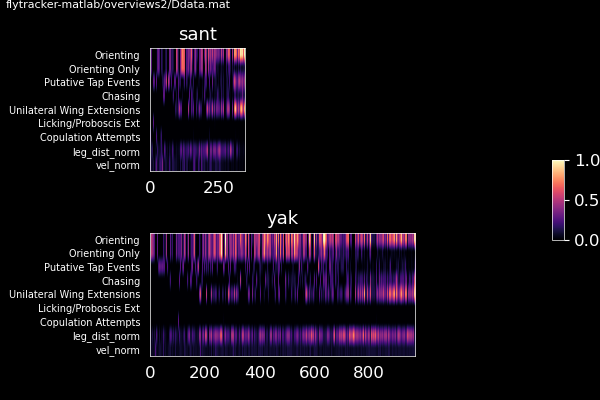

0
1


In [308]:
curr_species = [ 'sant', 'yak']
n_species = len(curr_species)
plotdf = bouts[bouts['species'].isin(curr_species)].copy()
fig, axn = pl.subplots( n_species, 1,  figsize=(6,4))
for ai, (sp, df_) in enumerate(plotdf.groupby(['species'])):
    print(ai)
    ax=axn[ai]
    df_ = df_.copy().sort_values(by='boutdur')
    im = ax.imshow(df_[plot_behaviors].T, cmap='magma', vmin=0, vmax=1)
    ax.set_aspect(50)
    ax.set_title(sp)
    ax.set_yticks(np.arange(0, len(plot_behaviors), 1))
    ax.set_yticks(np.arange(-0.5, len(plot_behaviors), 1), minor=True)
    ax.set_yticklabels(plot_behaviors, fontsize=7) #[plot_behaviors[int(v)] if v%1==0 else '' for i, v in enumerate(np.arange(0, len(plot_behaviors), 0.5))], fontsize=7)
for ax in axn:
    ax.set_anchor('W')
    #ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

pl.subplots_adjust(left=0.25, right=0.9)
cbar_ax = fig.add_axes([0.92, 0.4, 0.02, 0.2])
fig.colorbar(im, cax=cbar_ax)
pl.subplots_adjust(hspace=0.5)

putil.label_figure(fig, figid)
figname = 'events-by-bout_sort-boutdur_{}'.format('-'.join(curr_species))
pl.savefig(os.path.join(destdir, '{}.png'.format(figname)))

In [300]:
ax.get_xticks()

array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.])

In [252]:
for a, b in events[events['species']=='sant'].groupby('acquisition'):
    print(a, b['Time Vector (s)'].max(), b['copulation_index'].unique())


20220202-1415_sant_7do_sh 1835.6 [0.]
20220203-0912_sant_3do_sh 255.33333333333334 [15320.]
20220203-0951_sant_3do_sh 118.08333333333333 [7085.]
20220203-1025_sant_3do_sh 318.28333333333336 [19097.]


In [251]:
events.columns

Index(['index', 'All Wing Extensions', 'Putative Tap Events', 'Chasing',
       'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
       'Disengaged', 'Time Vector (s)', 'Copulation Start (s)',
       'Left Wing Extensions', 'Right Wing Extensions',
       'Bilateral Wing Extensions', 'boutnum', 'Unilateral Wing Extensions',
       'Orienting Only', 'vel', 'ang_vel', 'min_wing_ang', 'max_wing_ang',
       'mean_wing_length', 'axis_ratio', 'fg_body_ratio', 'contrast',
       'dist_to_wall', 'dist_to_other', 'angle_between', 'facing_angle',
       'leg_dist', 'id', 'fpath', 'frame', 'sec', 'sex', 'species', 'strain',
       'age', 'acquisition', 'copulation_index', 'copulation', 'boutdur'],
      dtype='object')

In [328]:
d_=[]
for (sp, acq), df_ in events.groupby(['species', 'acquisition']):
    ix = df_['copulation_index'].unique()[0]
    if ix > 0:
        d_.append(pd.Series({'species': sp, 'acquisition': acq, 
                             'time_to_cop': float(df_[df_['index']==ix-1]['Time Vector (s)'])}))


In [329]:
pd.concat(d_, axis=1).T

,species,acquisition,time_to_cop
0,mau,20220128-1555_mauR4_4do_gh,1015.775
1,mau,20220202-0930_mauW_7do_sh,1660.5
2,mau,20220203-0955_mauR_7do_sh,535.166667
3,mel,20220130-1125_ctns_4do_sh,345.8
4,mel,20220301_Canton-S_age5_m_sh_f_gh_1,158.083333
5,mel,20220301_Canton-S_age5_m_sh_f_gh_3,211.25
6,mel,20220301_Canton-S_age5_m_sh_f_gh_4,412.083333
7,mel,20220301_Canton-S_age5_m_sh_f_gh_6,254.833333
8,mel,20220303_Canton-S_age4_m_sh_f_gh_7,383.25
9,mel,20220307_Canton-S_age5_2,114.0


In [327]:
float(df_[df_['index']==ix-1]['Time Vector (s)'])


1047.1

In [236]:
bouts.groupby('species')['boutnum'].max()

species
mau     707.0
mel     196.0
rsim    562.0
sant    150.0
yak     502.0
Name: boutnum, dtype: float64

In [244]:
bouts.groupby('species')['boutdur'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
mau,1481.0,4.574460,10.510326,0.0,0.2000,0.850000,4.1000,158.475000
mel,1218.0,4.557293,9.719251,0.0,0.0500,0.433333,4.4500,103.216667
rsim,563.0,3.441030,6.604178,0.0,0.1500,0.600000,3.7625,60.100000
sant,346.0,7.284032,32.929645,0.0,0.1875,0.720833,4.1625,543.725000
yak,968.0,5.732688,34.845424,0.0,0.2500,0.900000,4.3500,1045.000000


<IPython.core.display.Javascript object>


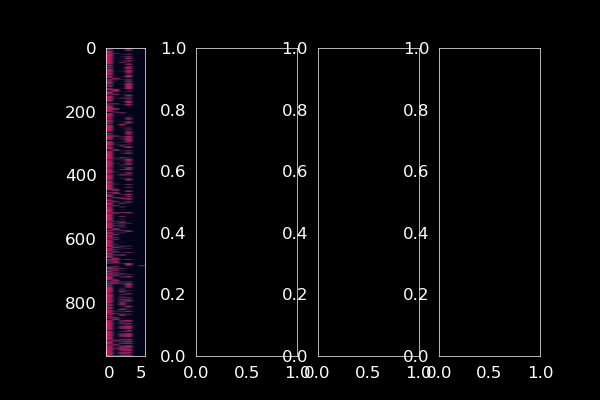

In [91]:
fig, axn = pl.subplots(1, n_species)
ax=axn[0]
ax.imshow(df_[plot_behaviors])
ax.set_aspect(0.05)
